<a href="https://colab.research.google.com/github/pkro/tensorflow_cert_training/blob/main/colab_notebooks/01b_a_larger_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## A larger example

We'll get a dataset from [kaggle](https://www.kaggle.com/)

[Description](https://www.kaggle.com/datasets/mirichoi0218/insurance)

Dataset: https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv

### Preparing the dataset

In [58]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
# history visualizer helper from previous notebook
import pandas as pd
def plot_history(history):
  pd.DataFrame(history.history).plot()
  plt.ylabel("loss")
  plt.xlabel("epochs")

In [60]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


The dependend variable - the one we're trying to predict - is "charges".

The others are the independent variables (= predictors / features / covariates).


In [61]:
# Convert text columns into numbers / one-hot encode categorical text variables

# create a new dataframe with one-hot encoded sex
dummies = pd.get_dummies(insurance['sex'], prefix='sex')
dummies

,sex_female,sex_male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1333,0,1
1334,1,0
1335,1,0
1336,1,0


In [62]:
# Concat the data
insurance = pd.concat([insurance, dummies], axis='columns')
insurance

,age,sex,bmi,children,smoker,region,charges,sex_female,sex_male
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,1,0
1335,18,female,36.850,0,no,southeast,1629.83350,1,0
1336,21,female,25.800,0,no,southwest,2007.94500,1,0


In [63]:
# delete the originial text column
insurance = insurance.drop(['sex'], axis='columns') # create new dataframe (or do it inplace as in the next example)

In [64]:
# this can be done in one go too, here for "smoker" and "region"
# note the double [[]]
# when supplying multiple, pandas automatically adds prefixes based on 
# the original column's name
dummies = pd.get_dummies(insurance[['smoker', 'region']]) # add .copy() if modification of the new dataframe is intended
dummies

,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0,1,0,0,0,1
1,1,0,0,0,1,0
2,1,0,0,0,1,0
3,1,0,0,1,0,0
4,1,0,0,1,0,0
...,...,...,...,...,...,...
1333,1,0,0,1,0,0
1334,1,0,1,0,0,0
1335,1,0,0,0,1,0
1336,1,0,0,0,0,1


In [65]:
# concat
insurance = pd.concat([insurance, dummies], axis="columns")
# and delete old columns
insurance.drop(['smoker', 'region'], axis="columns", inplace=True) # can be done inplace

insurance

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


### Build a regression model

In [66]:

# Create X and y values (features and labels)
features = insurance[insurance.columns.difference(['charges'])]
labels = insurance['charges']

# just aliasing because in the course X and y is used
X = features
y = labels

# Split into training and test set
idx_at_80_percent = round(len(insurance) / 100 * 80)
X_train = tf.constant(features[:idx_at_80_percent])
y_train = tf.constant(labels[:idx_at_80_percent])
X_test = tf.constant(features[idx_at_80_percent:])
y_test = tf.constant(labels[idx_at_80_percent:])

# Another (better) way usking scikit-learn; also randomizes the indexes automatically
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, train_size=0.8, random_state=42)
X_train


,age,bmi,children,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male,smoker_no,smoker_yes
560,46,19.950,2,0,1,0,0,1,0,1,0
1285,47,24.320,0,1,0,0,0,1,0,1,0
1142,52,24.860,0,0,0,1,0,1,0,1,0
969,39,34.320,5,0,0,1,0,1,0,1,0
486,54,21.470,3,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,1,0,0,0,1,0,1,0
1130,39,23.870,5,0,0,1,0,1,0,1,0
1294,58,25.175,0,1,0,0,0,0,1,1,0
860,37,47.600,2,0,0,0,1,1,0,0,1


In [67]:
tf.random.set_seed(42)
# Create model
insurance_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
], name="insurance_model")

# Compile model
insurance_model.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss=tf.keras.losses.mae,
    metrics=["mae"]
)

# Fit data
# fit converts dataframes automatically
insurance_model.fit(X_train, y_train, epochs=100, verbose=0)

### Evaluate

#### using model.evaluate

In [68]:
# evaluate
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 7074.3066 - mae: 7074.3066


[7074.306640625, 7074.306640625]

In [69]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

The mean average error is 8761, meaning it is on average off by 8761 with its predictions, which is way too high given the average / mean values

#### Using visualization

Digression from course to check how to plot multi-feature dataset predictions (spoiler: just pick one that's reasonably spread out)

In [70]:
# predict
y_pred = insurance_model.predict(X_test)
"...", y_pred[:10]

9/9 [==============================] - 0s 2ms/step


('...', array([[ 7626.5967 ],
        [ 4192.783  ],
        [13907.975  ],
        [ 8001.999  ],
        [ 3587.885  ],
        [ 3248.9832 ],
        [  883.05646],
        [ 9830.272  ],
        [ 3388.8914 ],
        [ 8489.794  ]], dtype=float32))

In [71]:
X_test['bmi']

764     25.175
887     30.020
890     26.885
1293    25.745
259     31.920
         ...  
109     35.090
575     27.170
535     28.025
543     47.410
846     34.200
Name: bmi, Length: 268, dtype: float64

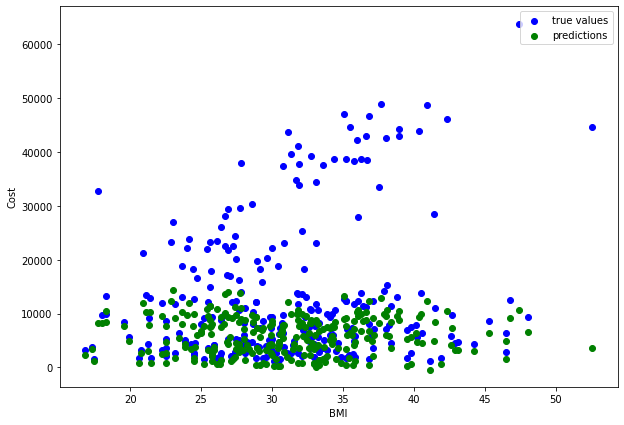

In [72]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
# pick just one feature for now to have something to visualize
# accuracy in a 2d plot
# remember, X_test is a pandas dataframe so we pick by column name
bmi = X_test['bmi']

# true values in blue
plt.scatter(bmi, y_test, c="blue", label="true values")
# predictions in green
plt.scatter(bmi, y_pred, c="green", label="predictions")
plt.xlabel('BMI')
plt.ylabel('Cost')
plt.legend()
plt.show()


### Experiment

In [73]:
tf.random.set_seed(42)
# remove 1 layer
insurance_model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(optimizer=tf.keras.optimizers.SGD(), 
                          loss=tf.keras.losses.MAE,
                          metrics=["mae"])
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [74]:
# evaluate again

# reminder of the loss of the previous model
print("insurance_model evaluation: ", insurance_model.evaluate(X_test, y_test))

# show losses of the current model
print("insurance_model_2 evaluation: ", insurance_model_2.evaluate(X_test, y_test))

9/9 [==============================] - 0s 2ms/step - loss: 7074.3066 - mae: 7074.3066
insurance_model evaluation:  [7074.306640625, 7074.306640625]
9/9 [==============================] - 0s 2ms/step - loss: 7000.7065 - mae: 7000.7065
insurance_model_2 evaluation:  [7000.70654296875, 7000.70654296875]


That's noticably better. Fiddle around in the below cell until we have a better result.

**Note**: if model.evaluate returns `nan`, it can be that the model is too complex to learn anything (e.g. too many layers / neurons)

In [75]:
# result of experiments

tf.random.set_seed(42)

insurance_model_3 = tf.keras.models.Sequential([
    # add a layer
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# change optimizer
insurance_model_3.compile(optimizer=tf.keras.optimizers.Adam(), 
                          loss=tf.keras.losses.MAE,
                          metrics=["mae"])
# more epochs
history_3 = insurance_model_3.fit(X_train, y_train, epochs=150, verbose=0)

print("insurance_model_2 evaluation: ", insurance_model_2.evaluate(X_test, y_test))
print("insurance_model_3 evaluation: ", insurance_model_3.evaluate(X_test, y_test))

9/9 [==============================] - 0s 2ms/step - loss: 7000.7065 - mae: 7000.7065
insurance_model_2 evaluation:  [7000.70654296875, 7000.70654296875]
9/9 [==============================] - 0s 2ms/step - loss: 3612.4795 - mae: 3612.4795
insurance_model_3 evaluation:  [3612.4794921875, 3612.4794921875]


In [76]:
insurance_model_3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 100)               1200      
                                                                 
 dense_22 (Dense)            (None, 10)                1010      
                                                                 
 dense_23 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


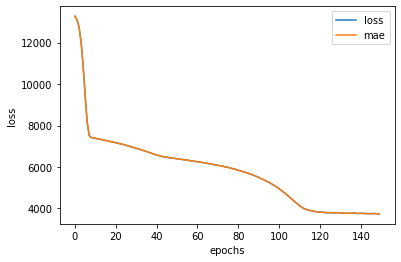

In [77]:
plot_history(history_3)

9/9 [==============================] - 0s 2ms/step - loss: 3612.4795 - mae: 3612.4795
insurance_model_3 evaluation:  [3612.4794921875, 3612.4794921875]
9/9 [==============================] - 0s 2ms/step - loss: 3496.1025 - mae: 3496.1025
insurance_model_4 evaluation:  [3496.1025390625, 3496.1025390625]


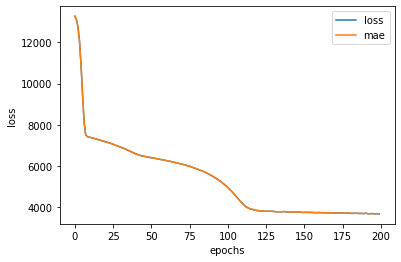

In [78]:
# Try to improve the so far best model insurance_model_3
tf.random.set_seed(42)

insurance_model_4 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# change learning rage
insurance_model_4.compile(optimizer=tf.keras.optimizers.Adam(), 
                          loss=tf.keras.losses.MAE,
                          metrics=["mae"])
# more epochs
history_4 = insurance_model_4.fit(X_train, y_train, epochs=200, verbose=0)

plot_history(history_4)
print("insurance_model_3 evaluation: ", insurance_model_3.evaluate(X_test, y_test))
print("insurance_model_4 evaluation: ", insurance_model_4.evaluate(X_test, y_test))

### EarlyStopping callback

**How long (how many epochs) should you train for?**

Depending on the problem.

Stop training when the model stops improving, visible in the flattened curve in the history.

TensorFlow has a solution: [EarlyStopping Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), which is a tensorflow component that can be added to the model to stop training once it stops improving a certain metric.

Usage:


    early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20)
    #...
    history_4_earlystopping = insurance_model_4.fit(X_train, y_train, epochs=200, verbose=0, callbacks=[early_stopping_callback])

### Improving by preprocesing data (normalization and standardization)

Steps for data preprocessing:

- Turn all data into numbers (done that)
- make sure all tensors are in the right shape (done that)
- **Scale features (normalize or standardize, neural networks tend to prefer normalization)**

**Normalization**: Scale features so they are in a range between 0 and 1 or any other common scale (without changing their relative differences), so that all features are in the same range, even if they have unrelated values (e.g. bmi and age)

**Standardization**: Rescale data so it has a mean of 0 and a standard deviation of 1 (unit variance).

If not sure which to use, try both and see which performs better.


![scaling and normalization](https://github.com/pkro/tensorflow_cert_training/blob/main/readme_images/scaling_normalization.png?raw=1)

[Aritcle: **Scale, Standardize, or Normalize with Scikit-Learn** by Jeff Hale](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02?gi=1e4eb97fe274)


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

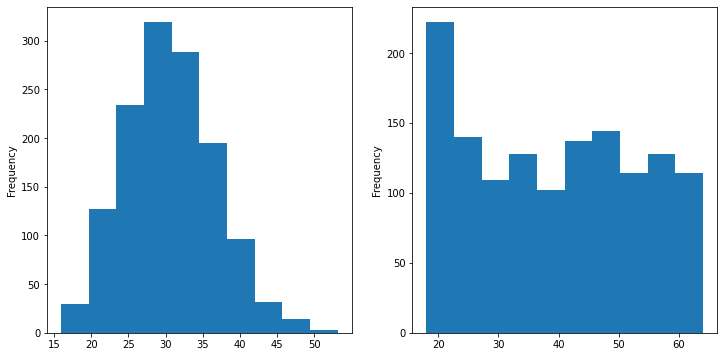

In [79]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
X["bmi"].plot(kind="hist", ax=axes[0], subplots=True) # col 1
X["age"].plot(kind="hist", ax=axes[1], subplots=True) # col 2
X["children"].value_counts()

#### Load data (again)

In [80]:
# re-doing stuff just to be able to copy / paste this later
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


#### Normalize (scale) and encode columns

In [81]:
# borrow a few classes from Scikit-Learn
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create a column trransformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in these cols to be between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"]) #  one-hot encode these cols
)

#### Create X and y (Features and labels)

In [82]:
# Create X and y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

#### split into training and test data

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Fit the column transformer to our training data

Fit the transformer with training data, then use the transformer to transform the test data (I don't get 100% why we don't use it on all data)

In [84]:
ct.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])

#### Transform training and test data with normalization (MinMaxScaler and OneHotEncoder)

In [86]:
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [91]:
# Check result
# transform returns an array / matrix, not a dataframe, so we have to create one on the fly for prettier viewing
pd.DataFrame(X_train_normal)

,0,1,2,3,4,5,6,7,8,9,10
0,0.608696,0.107345,0.4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.630435,0.224913,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.739130,0.239440,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.456522,0.493947,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.782609,0.148238,0.6,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1065,0.000000,0.414044,0.8,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1066,0.456522,0.212806,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1067,0.869565,0.247915,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1068,0.413043,0.851224,0.4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [93]:
# more columns due to one-hot encoding
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

#### Build neural network on the normalized / one-hot encoded data

In [102]:
tf.random.set_seed(42)
# Create
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
], name="model_with_normalized_data")

# Compile
model.compile(optimizer=tf.keras.optimizers.Adam(), loss="mae", metrics=["mae"])

# Fit
history_5 = model.fit(X_train_normal, y_train, epochs=200, verbose=0)


9/9 [==============================] - 0s 2ms/step - loss: 3171.5776 - mae: 3171.5776
new model evaluation:  [3171.57763671875, 3171.57763671875]


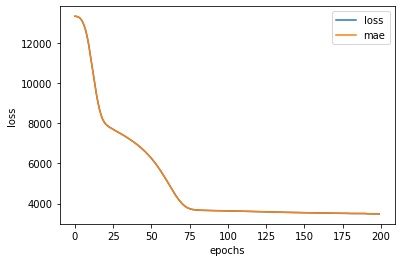

In [103]:
# Evaluate
plot_history(history_5)
print("new model evaluation: ", model.evaluate(X_test_normal, y_test))

**Result:** Noticably better loss and less epochs needed to get to it (faster **convergence time**), just by scaling / normalizing the data.
